# **Training of Multi-Layer Neural Network**

 Dalam upaya untuk mengatasi batasan praktis dari jaringan saraf tunggal, 
jaringan saraf berkembang menjadi arsitektur multi-lapis. Namun, dibutuhkan 
sekitar 30 tahun untuk menambahkan lapisan tersembunyi ke jaringan saraf tunggal. Sulit untuk memahami mengapa hal ini memakan waktu begitu lama, tetapi masalahnya 
berkaitan dengan aturan pembelajaran. Karena proses pelatihan adalah satu-satunya 
metode bagi jaringan saraf untuk menyimpan informasi, jaringan saraf yang tidak 
dapat dilatih menjadi tidak berguna. Aturan pembelajaran yang tepat untuk jaringan 
saraf berlapis membutuhkan waktu yang cukup lama untuk dikembangkan.


Aturan delta yang sebelumnya diperkenalkan tidak efektif untuk melatih jaringan 
saraf multi-lapis. Hal ini karena kesalahan, elemen esensial untuk menerapkan 
aturan delta dalam pelatihan, tidak didefinisikan pada lapisan tersembunyi. Kesalahan 
node output didefinisikan sebagai selisih antara output yang benar dan output 
jaringan saraf. Namun, data pelatihan tidak menyediakan 
output yang benar untuk node lapisan tersembunyi, sehingga kesalahan tidak dapat 
dihitung dengan pendekatan yang sama seperti pada node output. Lalu, bagaimana? Bukankah 
masalah sebenarnya adalah bagaimana mendefinisikan kesalahan pada node tersembunyi? Anda benar. Anda baru saja 
merumuskan algoritma back-propagation, aturan pembelajaran representatif 
jaringan saraf tiruan berlapis.


Pada tahun 1986, pengenalan algoritma back-propagation akhirnya menyelesaikan 
masalah pelatihan jaringan saraf tiruan berlapis.1 Signifikansi algoritma back-propagation 
adalah bahwa ia menyediakan metode sistematis untuk 
menentukan kesalahan pada node tersembunyi. Setelah kesalahan lapisan tersembunyi 
ditentukan, aturan delta diterapkan untuk menyesuaikan bobot. Lihat Gambar 3-1.

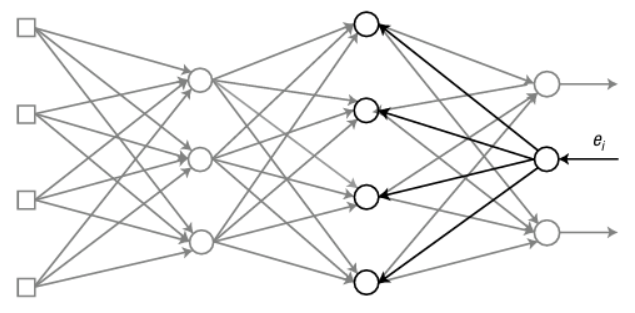

Gambar 3.1 Ilustrasi Back Propagation

Data masukan jaringan saraf melewati lapisan masukan, lapisan tersembunyi, dan 
lapisan keluaran. Sebaliknya, dalam algoritma back-propagation, kesalahan keluaran 
dimulai dari lapisan keluaran dan bergerak mundur hingga mencapai lapisan tersembunyi 
berikutnya yang tepat di depan lapisan masukan. Proses ini disebut back-propagation, 
karena mirip dengan kesalahan keluaran yang menyebar ke belakang. Bahkan dalam 
back-propagation, sinyal tetap mengalir melalui jalur penghubung dan bobot 
dikalikan. Perbedaan utamanya adalah sinyal input dan output mengalir 
dalam arah yang berlawanan.

Bagian ini menjelaskan algoritma back-propagation menggunakan contoh jaringan saraf 
multi-layer sederhana. Pertimbangkan jaringan saraf yang terdiri dari dua node untuk 
input dan output, serta lapisan tersembunyi yang juga memiliki dua node. Kami akan 
mengabaikan bias untuk kemudahan. Contoh jaringan saraf tersebut ditunjukkan pada 
Gambar 3-2, di mana superskrip menggambarkan indikator lapisan.

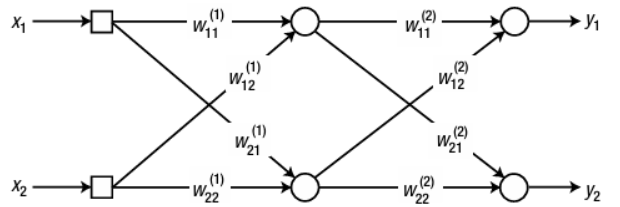

Gambar 3.2 Jaringan saraf yang terdiri dari dua node untuk input dan output serta lapisan tersembunyi yang memiliki dua node.

Untuk mendapatkan kesalahan keluaran, kita terlebih dahulu memerlukan keluaran jaringan saraf 
dari data masukan. Mari kita coba. Karena jaringan contoh memiliki satu lapisan tersembunyi, 
kita memerlukan dua manipulasi data masukan sebelum perhitungan keluaran diproses. 
Pertama, jumlah tertimbang dari node tersembunyi dihitung sebagai:

$$
\begin{bmatrix}
v^{(1)}_{1} \\
v^{(1)}_{2}
\end{bmatrix}
=
\begin{bmatrix}
w^{(1)}_{11} & w^{(1)}_{12} \\
w^{(1)}_{21} & w^{(1)}_{22}
\end{bmatrix}
\begin{bmatrix}
x_{1} \\
x_{2}
\end{bmatrix}
$$

$$
\
\triangleq \; W_{1}x
\
$$

### Ketika kita memasukkan jumlah terbobot ini, Persamaan 3.1, ke dalam fungsi aktivasi, kita memperoleh keluaran dari node-node tersembunyi.

$$
\begin{bmatrix}
y^{(1)}_{1} \\
y^{(1)}_{2}
\end{bmatrix}
=
\begin{bmatrix}
\varphi\!\left(v^{(1)}_{1}\right) \\
\varphi\!\left(v^{(1)}_{2}\right)
\end{bmatrix}
$$


### di mana $y^{(1)}_{1}$ dan $y^{(1)}_{2}$ adalah keluaran dari node-node tersembunyi yang bersesuaian. Dengan cara yang serupa, jumlah terbobot dari node-node keluaran dihitung sebagai:

$$
\begin{bmatrix}
v_{1} \\
v_{2}
\end{bmatrix}
=
\begin{bmatrix}
w^{(2)}_{11} & w^{(2)}_{12} \\
w^{(2)}_{21} & w^{(2)}_{22}
\end{bmatrix}
\begin{bmatrix}
y^{(1)}_{1} \\
y^{(1)}_{2}
\end{bmatrix}
\tag* {(Equation\ 3.2)}
$$

$$
\triangleq \; W_{2} y^{(1)}
$$


### Ketika kita memasukkan jumlah terbobot ini ke dalam fungsi aktivasi, jaringan saraf akan menghasilkan keluarannya.

$$
\begin{bmatrix}
y_{1} \\
y_{2}
\end{bmatrix}
=
\begin{bmatrix}
\varphi\!\left(v_{1}\right) \\
\varphi\!\left(v_{2}\right)
\end{bmatrix}
$$


### Sekarang, kita akan melatih jaringan saraf menggunakan algoritma back-propagation. Hal pertama yang harus dihitung adalah delta, δ, dari setiap node. Anda mungkin bertanya, "Apakah delta ini sama dengan delta pada aturan delta?" Ya, benar! Untuk menghindari kebingungan, diagram pada Gambar 3-3 telah digambar ulang dengan koneksi yang tidak diperlukan disamarkan.

![image.png](attachment:image.png)


#### Gambar 3-3. Melatih jaringan saraf menggunakan algoritma back-propagation

### Dalam algoritma back-propagation, delta (δ) dari node keluaran didefinisikan sama persis dengan aturan delta dari bagian "Aturan Delta yang Digeneralisasi" pada Bab 2, yaitu sebagai berikut:





$$
\begin{aligned}
e_{1} &= d_{1} - y_{1} \\
\delta_{1} &= \varphi'\!\left(v_{1}\right) e_{1} \\
\\
e_{2} &= d_{2} - y_{2} \\
\delta_{2} &= \varphi'\!\left(v_{2}\right) e_{2}
\end{aligned}
\tag*{(Equation 3.3)}
$$


Di mana $(y'_j(\cdot))$ adalah turunan dari fungsi aktivasi node keluaran, $(y_i)$ adalah keluaran dari node keluaran, $(d_i)$ adalah keluaran yang benar dari data pelatihan, dan $(v_i)$ adalah jumlah terbobot dari node yang bersesuaian.

Karena kita sudah memiliki delta $((\delta))$ untuk setiap node keluaran, kita bergerak ke kiri menuju node-node tersembunyi dan menghitung deltanya (Gambar 3--4).  Sekali lagi, koneksi yang tidak diperlukan disamarkan demi kenyamanan.


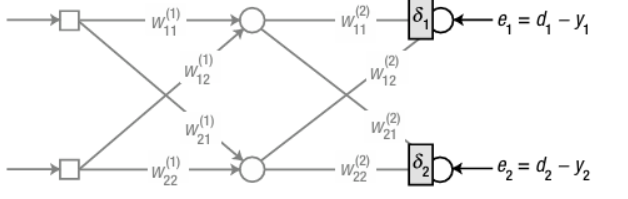

Gambar 3.3 Latih jaringan saraf tiruan menggunakan algoritma back-propagation.

### Dalam algoritma back-propagation, delta (δ) dari node keluaran didefinisikan sama persis dengan aturan delta dari bagian "Aturan Delta yang Digeneralisasi" pada Bab 2, yaitu sebagai berikut:





$$
\begin{aligned}
e_{1} &= d_{1} - y_{1} \\
\delta_{1} &= \varphi'\!\left(v_{1}\right) e_{1} \\
\\
e_{2} &= d_{2} - y_{2} \\
\delta_{2} &= \varphi'\!\left(v_{2}\right) e_{2}
\end{aligned}
\tag*{(Equation 3.3)}
$$


Di mana $(y'_j(\cdot))$ adalah turunan dari fungsi aktivasi node keluaran, $(y_i)$ adalah keluaran dari node keluaran, $(d_i)$ adalah keluaran yang benar dari data pelatihan, dan $(v_i)$ adalah jumlah terbobot dari node yang bersesuaian.

Karena kita sudah memiliki delta $((\delta))$ untuk setiap node keluaran, kita bergerak ke kiri menuju node-node tersembunyi dan menghitung deltanya (Gambar 3--4).  Sekali lagi, koneksi yang tidak diperlukan disamarkan demi kenyamanan.


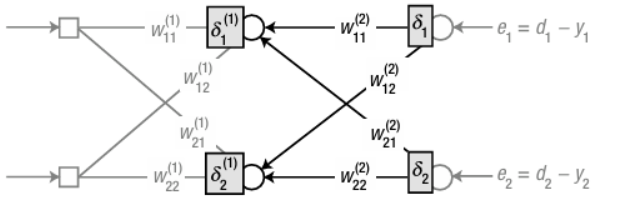

Gambar 3.4 Lanjutkan ke kiri menuju node tersembunyi dan hitung delta.

### Seperti yang dibahas di awal bab, masalah pada node tersembunyi adalah bagaimana mendefinisikan galat (error). Dalam algoritma back-propagation, galat dari node didefinisikan sebagai jumlah terbobot dari delta yang disebarkan kembali (back-propagated deltas) dari lapisan yang berada tepat di sebelah kanan (dalam hal ini, lapisan keluaran). Setelah galat diperoleh,

 ## Back-Propagation Algorithm

Perhitungan delta dari node sama dengan yang terdapat pada Persamaan 3.3.
Proses ini dapat dinyatakan sebagai berikut:

\begin{align}
e_{1}^{(1)} &= w_{11}^{(2)} \, \delta_{1} + w_{21}^{(2)} \, \delta_{2} \\
\delta_{1}^{(1)} &= \varphi' \left( v_{1}^{(1)} \right) e_{1}^{(1)} \\
e_{2}^{(1)} &= w_{12}^{(2)} \, \delta_{1} + w_{22}^{(2)} \, \delta_{2} \\
\delta_{2}^{(1)} &= \varphi' \left( v_{2}^{(1)} \right) e_{2}^{(1)}
\end{align}

\begin{equation}
\text{(Equation 3.4)}
\end{equation}

di mana $v_{1}^{(1)}$ dan $v_{2}^{(1)}$ adalah jumlah bobot dari sinyal maju pada masing-masing node.
Dapat terlihat dari persamaan ini bahwa proses maju dan mundur diterapkan dengan cara yang sama pada node tersembunyi maupun pada node keluaran.
Hal ini menunjukkan bahwa node keluaran dan node tersembunyi mengalami proses mundur yang sama.
Satu-satunya perbedaan terletak pada perhitungan error (Gambar 3-5).

\begin{figure}[h]
\centering
\begin{tikzpicture}[node distance=2cm]
\node (v) [circle,draw] {$\nu$};
\node (y) [right of=v] {$y$};
\draw[->] (v) -- (y);
\node at (0.8,-0.5) {$\varphi(\nu)=y$};

\node (d) [circle,draw,below of=v,yshift=-2cm] {$\delta$};
\node (e) [right of=d] {$e$};
\draw[->] (d) -- (e);
\node at (0.8,-2.5) {$\delta = \varphi'(\nu) \times e$};
\end{tikzpicture}
\caption{The error calculation is the only difference}
\end{figure}

Secara ringkas, error pada node tersembunyi dihitung sebagai jumlah berbobot mundur dari delta,
dan delta pada node merupakan hasil perkalian antara error dengan turunan dari fungsi aktivasi.
Proses ini dimulai dari lapisan keluaran dan berulang pada semua lapisan tersembunyi.
Inilah inti dari algoritma back-propagation.

Dua rumus perhitungan error pada Persamaan 3.4 dapat digabungkan dalam bentuk persamaan matriks sebagai berikut:

\begin{equation}
\begin{bmatrix}
e_{1}^{(1)} \\
e_{2}^{(1)}
\end{bmatrix}
=
\begin{bmatrix}
w_{11}^{(2)} & w_{21}^{(2)} \\
w_{12}^{(2)} & w_{22}^{(2)}
\end{bmatrix}
\begin{bmatrix}
\delta_{1} \\
\delta_{2}
\end{bmatrix}
\tag{Equation 3.5}
\end{equation}

Bandingkan persamaan ini dengan keluaran jaringan saraf pada Persamaan 3.2.
Matriks pada Persamaan 3.5 merupakan hasil transpose dari matriks bobot $W$ pada Persamaan 3.2.
Oleh karena itu, Persamaan 3.5 dapat dituliskan kembali sebagai:

\begin{equation}
\begin{bmatrix}
e_{1}^{(1)} \\
e_{2}^{(1)}
\end{bmatrix}
=
W_{2}^{T}
\begin{bmatrix}
\delta_{1} \\
\delta_{2}
\end{bmatrix}
\tag{Equation 3.6}
\end{equation}

Persamaan ini menunjukkan bahwa error dapat diperoleh dari hasil perkalian antara matriks bobot yang ditranspos dengan vektor delta.

Akhirnya, bobot dapat disesuaikan dengan menggunakan persamaan berikut:

\begin{align}
\Delta w_{ij} &= \alpha \, \delta_{j} \, x_{i} \\
w_{ij} &\leftarrow w_{ij} + \Delta w_{ij}
\end{align}

\begin{equation}
\text{(Equation 3.7)}
\end{equation}

## Contoh : Back-Propagation


### Pada bagian ini, kita akan mengimplementasikan algoritma back-propagation. Training data yang digunakan terdiri dari empat elemen, seperti terlihat pada tabel berikut. Karena ini termasuk supervised learning, maka data harus memiliki pasangan input dan target output yang benar. Angka di paling kanan (yang dicetak tebal) adalah target output atau hasil yang seharusnya diprediksi oleh jaringan. Seperti yang mungkin sudah diperhatikan, data ini sama dengan yang digunakan pada Bab 2 untuk melatih single-layer neural network; di mana single-layer neural network tersebut gagal mempelajarinya.


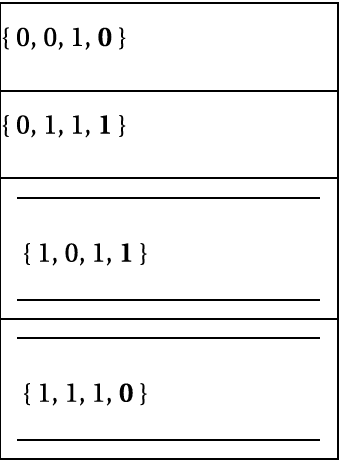


### Dengan mengabaikan nilai ketiga dari input (sumbu Z), dataset ini sebenarnya merepresentasikan operasi logika XOR. Oleh karena itu, jika neural network dilatih menggunakan dataset ini, maka akan diperoleh model operasi XOR.

### Pertimbangkan sebuah neural network yang terdiri dari tiga input nodes dan satu output node, seperti ditunjukkan pada Gambar 3-8. Jaringan ini memiliki satu hidden layer dengan empat nodes. Sigmoid function (fungsi aktivasi berbasis kurva sigmoid yang output-nya antara 0–1) digunakan sebagai activation function (fungsi yang menentukan nilai keluaran dari sebuah node berdasarkan input yang diterima) baik pada hidden nodes maupun pada output node.

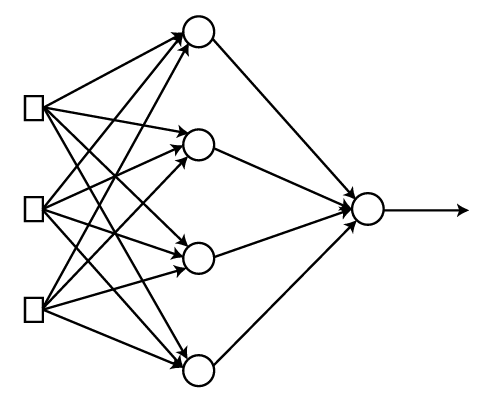

### **Gambar 3-8.** Neural network yang terdiri dari tiga input nodes dan satu output node


Bagian ini menggunakan metode **SGD (Stochastic Gradient Descent)** untuk mengimplementasikan algoritma propagasi balik. Sebenarnya, metode batch juga dapat digunakan. Perbedaan utamanya adalah pada metode batch pembaruan bobot dilakukan dengan menggunakan rata-rata dari seluruh data pelatihan, seperti yang ditunjukkan pada contoh di bagian "Aturan Delta" pada Bab 2. Namun, karena tujuan utama dari bagian ini adalah untuk memahami algoritma backpropagation, maka digunakanlah metode yang lebih sederhana dan intuitif, yaitu **SGD**.

### Masalah XOR

Fungsi **BackpropXOR**, yang mengimplementasikan algoritma backpropagation dengan metode SGD, bekerja dengan cara mengambil bobot jaringan serta data pelatihan, lalu mengembalikan bobot yang telah diperbarui.  

[W1, W2] = BackpropXOR(W1, W2, X, D)


Pada fungsi ini, `W1` dan `W2` adalah matriks bobot dari masing-masing lapisan. `W1` merupakan matriks bobot antara lapisan input dan lapisan tersembunyi, sedangkan `W2` adalah matriks bobot antara lapisan tersembunyi dan lapisan output. Variabel `X` berisi data input dan `D` berisi data target atau output yang benar dari data pelatihan.  

Daftar berikut memperlihatkan isi dari file **BackpropXOR.m**, yaitu fungsi yang mengimplementasikan algoritma BackpropXOR.

function [W1, W2] = BackpropXOR(W1, W2, X, D) 
    alpha = 0.9;

    N = 4;
    for k = 1:N
        x = X(k, :)'; 
        d = D(k);

        v1 = W1 * x;
        y1 = Sigmoid(v1); 
        v  = W2 * y1;
        y  = Sigmoid(v);

        e     = d - y;
        delta = y .* (1 - y) .* e;

        e1     = W2' * delta; 
        delta1 = y1 .* (1 - y1) .* e1;

        dW1 = alpha * delta1 * x'; 
        W1  = W1 + dW1;

        dW2 = alpha * delta * y1'; 
        W2  = W2 + dW2;
    end
end

import numpy as np

def Sigmoid(x):
    return 1 / (1 + np.exp(-x))

def BackpropXOR(W1, W2, X, D, alpha=0.9):
    N = 4
    
    for k in range(N):
        x = X[k, :].reshape(-1, 1)    # MATLAB: x= X(k, :)'
        d = D[k]

        v1 = np.dot(W1, x)
        y1 = Sigmoid(v1)
        v  = np.dot(W2, y1)
        y  = Sigmoid(v)

        e     = d - y
        delta = y * (1 - y) * e

        e1     = np.dot(W2.T, delta)
        delta1 = y1 * (1 - y1) * e1

        dW1 = alpha * np.dot(delta1, x.T)
        W1  = W1 + dW1

        dW2 = alpha * np.dot(delta, y1.T)
        W2  = W2 + dW2

    return W1, W2


Kode ini mengambil titik dari dataset pelatihan, kemudian menghitung pembaruan bobot (`dW`), menggunakan aturan delta, dan menyesuaikan bobot. Secara umum, proses ini hampir sama dengan contoh kode pada Bab 2. Perbedaannya terletak pada dua hal, yaitu adanya pemanggilan fungsi **Sigmoid** untuk perhitungan output, serta penambahan perhitungan delta (`delta1`) yang menggunakan propagasi balik dari delta output. Perhitungan delta dituliskan sebagai berikut:


`e1     = W2' * delta;`

`delta1 = y1 .* (1 - y1) .* e1;`

Perhitungan kesalahan `e1` merupakan implementasi dari Persamaan 3.6. Karena langkah ini melibatkan propagasi balik dari delta, maka digunakan matriks transpos `W2'`. Pada perhitungan delta (`delta1`) digunakan operator hasil kali elemen `.*`, sebab variabel yang dihitung berupa vektor. MATLAB menyediakan operator ini dengan menambahkan tanda titik (`.`) di depan operator, sehingga setiap operasi dilakukan pada elemen-elemen vektor secara simultan. Dengan cara ini, perhitungan delta dapat dilakukan secara paralel untuk banyak titik sekaligus.

### Fungsi Sigmoid

Fungsi **Sigmoid** yang dipanggil oleh kode BackpropXOR juga menggunakan pembagian elemen-bijaksana (`./`) untuk mempermudah perhitungan vektor. Bentuk fungsi dituliskan sebagai berikut:

```
function y = Sigmoid(x)

    y = 1 ./ (1 + exp(-x)); end


Fungsi Sigmoid yang dimodifikasi ini dapat bekerja langsung dengan vektor. Contoh penggunaannya ditunjukkan pada perintah berikut:

`Sigmoid([-1 0 1])`

Hasil keluaran:

`[0.2689   0.5000   0.7311]`

In [1]:
import numpy as np

# Perhitungan delta
# e1     = W2' * delta;
# delta1 = y1 .* (1 - y1) .* e1;

# Fungsi Sigmoid
def Sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

# Contoh penggunaan
print(Sigmoid(np.array([-1, 0, 1])))


[0.26894142 0.5        0.73105858]


Selain itu, terdapat program TestBackpropXOR.m yang berfungsi untuk menguji BackpropXOR. Program ini memanggil fungsi BackpropXOR dan melatih jaringan syaraf sebanyak 10.000 kali. Masukan yang digunakan adalah jaringan XOR standar, dengan hasil keluaran ditampilkan pada layar.

Performa pelatihan dapat divisualisasikan dengan menghitung kesalahan rata-rata kuadrat (MSE) dari data pelatihan. Prinsip perhitungan ini sama dengan yang sudah dibahas sebelumnya pada Bab 2.

### dalam momentum. Oleh karena itu, bobot tidak hanya dipengaruhi oleh nilai pembaruan bobot tertentu. Oleh karena itu, stabilitas pembelajaran meningkat. Selain itu, momentum semakin bertambah seiring dengan pembaruan bobot. Akibatnya, pembaruan bobot menjadi semakin besar juga. Oleh karena itu, laju pembelajaran meningkat.

### Daftar berikut ini menunjukkan file BackpropMmt.m, yang mengimplementasikan algoritma algoritma propagasi balik dengan momentum. Fungsi BackpropMmt beroperasi dengan cara yang sama seperti contoh sebelumnya; fungsi ini mengambil bobot dan data pelatihan dan mengembalikan bobot yang telah disesuaikan. Daftar ini menggunakan variabel yang sama seperti yang didefinisikan dalam fungsi BackpropX0R.

import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def backprop_mmt(W1, W2, X, D):
    alpha = 0.9
    beta = 0.9
    mmt1 = np.zeros_like(W1)
    mmt2 = np.zeros_like(W2)

    N = X.shape[0]
    for k in range(N):
        x = X[k, :].reshape(-1, 1)   # vektor kolom
        d = D[k]

        v1 = W1 @ x
        y1 = sigmoid(v1)

        v = W2 @ y1
        y = sigmoid(v)

        e = d - y
        delta = y * (1 - y) * e

        e1 = W2.T @ delta
        delta1 = y1 * (1 - y1) * e1

        dW1 = alpha * (delta1 @ x.T)
        mmt1 = dW1 + beta * mmt1
        W1 = W1 + mmt1

        dW2 = alpha * (delta @ y1.T)
        mmt2 = dW2 + beta * mmt2
        W2 = W2 + mmt2

    return W1, W2

#### Catatan Istilah  

<small>

| **Istilah**                | **Penjelasan Singkat**                                                                 |
|-----------------------------|----------------------------------------------------------------------------------------|
| **Back-propagation**        | Algoritma pembelajaran pada neural network yang memperbaiki bobot dengan mempropagasikan error ke belakang. |
| **Training data**           | Data pelatihan berisi pasangan input–output.                                           |
| **Supervised learning**     | Metode pembelajaran terawasi dengan data berupa pasangan input–output yang benar.      |
| **Target output**           | Nilai keluaran yang seharusnya diprediksi oleh neural network.                         |
| **Single-layer neural network** | Jaringan saraf dengan satu lapisan (tanpa hidden layer).                             |
| **XOR (Exclusive OR)**      | Operasi logika yang menghasilkan output 1 jika salah satu input bernilai 1, tetapi bukan keduanya. |
| **Input node**              | Node pada neural network yang menerima data masukan.                                  |
| **Output node**             | Node pada neural network yang menghasilkan keluaran.                                  |
| **Hidden layer**            | Lapisan tersembunyi di dalam neural network yang memproses pola non-linear.           |
| **Sigmoid function**        | Fungsi aktivasi berbentuk kurva S yang memetakan input ke rentang 0–1.                |
| **Activation function**     | Fungsi matematis yang menentukan nilai keluaran dari node berdasarkan input yang diterima. |

</small>


### Code ini menginisialisasi momentum, mmt1 dan mmt2, sebagai nol ketika memulai proses pembelajaran. Rumus penyesuaian bobot dimodifikasi untuk merefleksikan momentum sebagai:

In [2]:
dW1 = alpha * (delta1 @ x.T)
mmt1 = dW1 + beta * mmt1
W1 = W1 + mmt1

NameError: name 'alpha' is not defined

### Daftar program berikut ini menunjukkan file TestBackpropMmt.m, yang menguji fungsi BackpropMmt. Program ini memanggil fungsi BackpropMmt dan melatih jaringan syaraf sebanyak 10.000 kali. Data pelatihan diumpankan ke jaringan saraf dan hasilnya ditampilkan di layar. Kinerja pelatihan diverifikasi dengan membandingkan output dengan output yang benar dari data pelatihan. Karena kode ini hampir sama dengan contoh sebelumnya, penjelasan lebih lanjut dihilangkan.

In [3]:
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])
D = np.array([[0],
              [1],
              [1],
              [0]])

# inisialisasi bobot acak
W1 = 2*np.random.rand(4, 3) - 1
W2 = 2*np.random.rand(1, 4) - 1

# training 10.000 epoch
for epoch in range(10000):
    W1, W2 = backprop_mmt(W1, W2, X, D)

# inference / testing
N = 4
for k in range(N):
    x = X[k, :]
    y1 = sigmoid(W1 @ x)
    v = W2*y1
    y = sigmoid(v)

NameError: name 'backprop_mmt' is not defined

In [1]:
import numpy as np

# fungsi sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Backpropagation XOR sesuai MATLAB
def BackpropXOR(W1, W2, X, D, alpha=0.9):
    N = X.shape[0]  # jumlah data (4)
    for k in range(N):
        x = X[k, :].reshape(-1, 1)  # vektor kolom (3x1)
        d = D[k]                    # target (skalar)

        # forward pass
        v1 = np.dot(W1, x)
        y1 = sigmoid(v1)

        v  = np.dot(W2, y1)
        y  = sigmoid(v)

        # error
        e = d - y

        # delta output
        delta = y * (1 - y) * e

        # backprop ke hidden
        e1 = np.dot(W2.T, delta)
        delta1 = y1 * (1 - y1) * e1

        # update bobot
        dW1 = alpha * np.dot(delta1, x.T)
        W1  = W1 + dW1

        dW2 = alpha * np.dot(delta, y1.T)
        W2  = W2 + dW2

    return W1, W2

# -------- Main program --------
np.random.seed(0)  # biar hasil konsisten

# data XOR + bias input 1
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])
D = np.array([0, 1, 1, 0])

# inisialisasi bobot random di [-1, 1]
W1 = 2 * np.random.rand(4, 3) - 1
W2 = 2 * np.random.rand(1, 4) - 1

# training 10.000 epoch
for epoch in range(10000):
    W1, W2 = BackpropXOR(W1, W2, X, D)

# inference
N = 4
for k in range(N):
    x = X[k, :].reshape(-1, 1)
    v1 = np.dot(W1, x)
    y1 = sigmoid(v1)
    v  = np.dot(W2, y1)
    y  = sigmoid(v)
    print(f"Input {X[k]} -> Target {D[k]} -> Prediksi {y[0,0]:.4f}")


Input [0 0 1] -> Target 0 -> Prediksi 0.0085
Input [0 1 1] -> Target 1 -> Prediksi 0.9882
Input [1 0 1] -> Target 1 -> Prediksi 0.9880
Input [1 1 1] -> Target 0 -> Prediksi 0.0171


### Jalankan kode di atas, dan temukan nilai-nilai berikut di layar. Nilai-nilai ini sangat mendekati output yang benar, D, yang menunjukkan bahwa jaringan saraf tiruan telah terlatih dengan baik. Sekarang kita telah memastikan bahwa jaringan saraf tiruan multi-layer mampu menyelesaikan masalah XOR, yang sebelumnya gagal dimodelkan dengan benar oleh jaringan saraf lapisan tunggal.

$$
\begin{bmatrix}
0.0060 \\
0.9888 \\
0.9891 \\
0.0134
\end{bmatrix}
\;\;\Longleftrightarrow\;\;
D =
\begin{bmatrix}
0 \\
1 \\
1 \\
0
\end{bmatrix}
$$

# Momentum

### Bagian ini membahas variasi dari penyesuaian bobot (weight adjustment). Selama ini, penyesuaian bobot bergantung pada bentuk paling sederhana dari Persamaan 2.7 dan 3.7. Namun, ada berbagai bentuk penyesuaian bobot yang tersedia.³Keuntungan menggunakan rumus penyesuaian bobot yang lebih maju meliputi stabilitas yang lebih tinggi dan kecepatan pelatihan jaringan saraf yang lebih cepat. Karakteristik ini sangat menguntungkan untuk Deep Learning karena sulit untuk dilatih. Bagian ini hanya membahas rumus-rumus yang melibatkan momentum, yang telah digunakan sejak lama. Jika diperlukan, Anda dapat mempelajari lebih lanjut melalui tautan yang ditunjukkan pada catatan kaki.

### Momentum, dilambangkan dengan $m$, adalah sebuah istilah yang ditambahkan pada aturan delta untuk menyesuaikan bobot. Penggunaan istilah momentum membuat penyesuaian bobot bergerak ke arah tertentu hingga batas tertentu, bukan langsung berubah secara mendadak. Hal ini mirip dengan momentum dalam fisika, yang memperlambat reaksi tubuh terhadap gaya luar.

\begin{align*}
\Delta w &= \alpha \delta x \\[6pt]
m &= \Delta w + \beta m^{-} \\[6pt]
w &= w + m \\[6pt]
m^{-} &= m
\tag*{(Persamaan 3.8)}
\end{align*}



### Di mana $m^{-}$ adalah momentum sebelumnya dan $\beta$ adalah konstanta positif yang nilainya kurang dari $1$. Mari kita lihat secara singkat mengapa kita memodifikasi rumus penyesuaian bobot dengan cara ini. Langkah-langkah berikut menunjukkan bagaimana momentum berubah seiring waktu:

\begin{align*}
m(0) &= 0 \\[2pt]
m(1) &= \Delta w(1) + \beta m(0) \\
     &= \Delta w(1) \\[2pt]
m(2) &= \Delta w(2) + \beta m(1) \\
     &= \Delta w(2) + \beta \Delta w(1) \\[2pt]
m(3) &= \Delta w(3) + \beta m(2) \\
     &= \Delta w(3) + \beta\{\Delta w(2) + \beta \Delta w(1)\} \\
     &= \Delta w(3) + \beta \Delta w(2) + \beta^2 \Delta w(1) \\
&\vdots
\end{align*}

### Dari langkah-langkah ini terlihat bahwa pembaruan bobot sebelumnya, yaitu $\Delta w(1)$, $\Delta w(2)$, $\Delta w(3)$, dan seterusnya, ditambahkan ke setiap momentum sepanjang proses. Karena  $\beta$ kurang dari $1$, pembaruan bobot yang lebih lama memberikan pengaruh yang lebih kecil pada momentum. Meskipun pengaruhnya berkurang seiring waktu, pembaruan bobot lama tetap ada dalam momentum.

### Oleh karena itu, bobot tidak hanya dipengaruhi oleh nilai pembaruan bobot tertentu. Oleh karena itu, stabilitas pembelajaran meningkat. Selain itu, momentum semakin bertambah seiring dengan pembaruan bobot. Akibatnya, pembaruan bobot menjadi semakin besar juga. Oleh karena itu, laju pembelajaran meningkat.

### Daftar berikut ini menunjukkan file BackpropMmt.m, yang mengimplementasikan algoritma algoritma propagasi balik dengan momentum. Fungsi BackpropMmt beroperasi dengan cara yang sama seperti contoh sebelumnya; fungsi ini mengambil bobot dan data pelatihan dan mengembalikan bobot yang telah disesuaikan. Daftar ini menggunakan variabel yang sama seperti yang didefinisikan dalam fungsi BackpropX0R.

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def backprop_mmt(W1, W2, X, D):
    alpha = 0.9
    beta = 0.9
    mmt1 = np.zeros_like(W1)
    mmt2 = np.zeros_like(W2)

    N = X.shape[0]
    for k in range(N):
        x = X[k, :].reshape(-1, 1)   # vektor kolom
        d = D[k]

        v1 = W1 @ x
        y1 = sigmoid(v1)

        v = W2 @ y1
        y = sigmoid(v)

        e = d - y
        delta = y * (1 - y) * e

        e1 = W2.T @ delta
        delta1 = y1 * (1 - y1) * e1

        dW1 = alpha * (delta1 @ x.T)
        mmt1 = dW1 + beta * mmt1
        W1 = W1 + mmt1

        dW2 = alpha * (delta @ y1.T)
        mmt2 = dW2 + beta * mmt2
        W2 = W2 + mmt2

    return W1, W2

### Code ini menginisialisasi momentum, mmt1 dan mmt2, sebagai nol ketika memulai proses pembelajaran. Rumus penyesuaian bobot dimodifikasi untuk merefleksikan momentum sebagai:

In [ ]:
dW1 = alpha * (delta1 @ x.T)
mmt1 = dW1 + beta * mmt1
W1 = W1 + mmt1

### Daftar program berikut ini menunjukkan file TestBackpropMmt.m, yang menguji fungsi BackpropMmt. Program ini memanggil fungsi BackpropMmt dan melatih jaringan syaraf sebanyak 10.000 kali. Data pelatihan diumpankan ke jaringan saraf dan hasilnya ditampilkan di layar. Kinerja pelatihan diverifikasi dengan membandingkan output dengan output yang benar dari data pelatihan. Karena kode ini hampir sama dengan contoh sebelumnya, penjelasan lebih lanjut dihilangkan.

In [32]:
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])
D = np.array([[0],
              [1],
              [1],
              [0]])

# inisialisasi bobot acak
W1 = 2*np.random.rand(4, 3) - 1
W2 = 2*np.random.rand(1, 4) - 1

# training 10.000 epoch
for epoch in range(10000):
    W1, W2 = backprop_mmt(W1, W2, X, D)

# inference / testing
N = 4
for k in range(N):
    x = X[k, :]
    y1 = sigmoid(W1 @ x)
    v = W2*y1
    y = sigmoid(v)

### Fungsi Biaya dan Aturan Pembelajaran

Bagian ini secara singkat menjelaskan apa itu fungsi biaya dan bagaimana pengaruhnya terhadap aturan pembelajaran pada jaringan saraf tiruan. Fungsi biaya merupakan konsep matematis yang berkaitan dengan teori optimasi. Kamu tidak harus benar-benar menguasainya. Namun, akan lebih baik jika mengetahuinya untuk memahami aturan pembelajaran pada jaringan saraf. Konsep ini sebenarnya tidak sulit untuk diikuti.

Fungsi biaya berhubungan dengan pembelajaran terawasi (supervised learning) pada jaringan saraf. Pada Bab 2 telah dijelaskan bahwa pembelajaran terawasi pada jaringan saraf adalah proses penyesuaian bobot untuk mengurangi kesalahan pada data pelatihan. Dalam konteks ini, ukuran kesalahan jaringan saraf adalah fungsi biaya. Semakin besar kesalahan jaringan saraf, maka semakin tinggi pula nilai fungsi biaya. Terdapat dua jenis utama fungsi biaya dalam pembelajaran terawasi pada jaringan saraf.

\begin{equation}
J = \sum_{i=1}^{M} \frac{1}{2} \left( d_i - y_i \right)^{2}
\end{equation}

\begin{equation}
J = \sum_{i=1}^{M} \left\{ -d_i \ln(y_i) - (1-d_i)\ln(1-y_i) \right\}
\end{equation}

Di mana y_i adalah keluaran dari node output, di adalah keluaran yang benar dari data pelatihan, dan M adalah jumlah node output.

Pertama, perhatikan jumlah dari galat kuadrat (sum of squared error) yang ditunjukkan pada Persamaan 3.9. Fungsi biaya ini merupakan kuadrat dari selisih antara keluaran jaringan saraf (y) dan keluaran yang benar (d). Jika keluaran dan keluaran yang benar sama, maka galatnya menjadi nol. Sebaliknya, semakin besar perbedaan antara kedua nilai tersebut akan menghasilkan galat yang lebih besar. Hal ini diilustrasikan pada Gambar 3.9

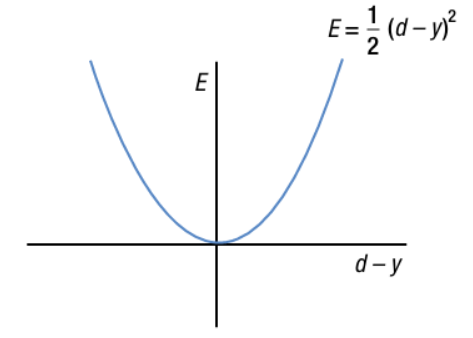

Terlihat jelas bahwa nilai fungsi biaya berbanding lurus dengan galat. Hubungan ini begitu intuitif sehingga tidak memerlukan penjelasan lebih lanjut. Sebagian besar penelitian awal mengenai jaringan saraf menggunakan fungsi biaya ini untuk menurunkan aturan pembelajaran. Tidak hanya aturan delta pada bab sebelumnya yang diturunkan dari fungsi ini, tetapi juga algoritme back-propagation. Hingga kini, masalah regresi masih menggunakan fungsi biaya ini.

Sekarang, perhatikan fungsi biaya pada Persamaan 3.10. Rumus berikut, yang terdapat di dalam kurung kurawal, disebut dengan fungsi entropi silang (cross entropy function).

\begin{equation}
E = -d \ln(y) - (1-d)\ln(1-y)
\end{equation}

Mungkin agak sulit untuk secara intuitif memahami hubungan fungsi entropi silang dengan galat. Hal ini karena persamaannya dipadatkan agar lebih sederhana dalam penulisan. Persamaan 3.10 sebenarnya merupakan gabungan dari dua persamaan berikut.

\begin{equation}
E =
\begin{cases}
-\ln(y), & d = 1 \\
-\ln(1-y), & d = 0
\end{cases}
\end{equation}

Berdasarkan definisi logaritma, keluaran (y) harus berada dalam rentang 0 hingga 1. Oleh karena itu, fungsi biaya entropi silang sering dipasangkan dengan fungsi aktivasi sigmoid dan softmax pada jaringan saraf tiruan. Sekarang kita akan melihat bagaimana fungsi ini berhubungan dengan galat. Ingat bahwa fungsi biaya seharusnya berbanding lurus dengan galat keluaran. Lalu, bagaimana dengan fungsi yang satu ini?

Gambar 3-10 menunjukkan fungsi entropi silang pada kondisi d = 1.

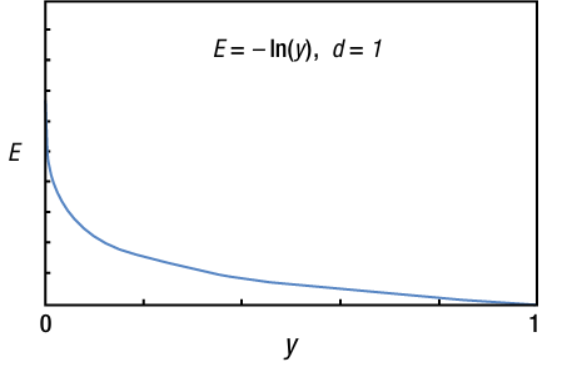

  Gambar 3-10.Fungsi entropi silang pada kondisi d = 1

Ketika keluaran y = 1, yaitu galat (d – y) sama dengan 0, maka nilai fungsi biaya juga sama dengan 0. Sebaliknya, ketika keluaran y mendekati 0, yaitu galat semakin besar, maka nilai fungsi biaya meningkat tajam. Oleh karena itu, fungsi biaya ini berbanding lurus dengan galat.

Gambar 3-11 menunjukkan fungsi biaya pada kondisi d = 0. Jika keluaran y = 0, maka galat sama dengan 0 dan fungsi biaya menghasilkan nilai 0. Namun, ketika keluaran mendekati 1, yaitu galat semakin besar, nilai fungsi biaya juga meningkat tajam. Dengan demikian, dalam kasus ini fungsi biaya juga berbanding lurus dengan galat.

Kedua kasus tersebut menegaskan bahwa fungsi biaya pada Persamaan 3.10 memang berbanding lurus dengan galat keluaran jaringan saraf tiruan.

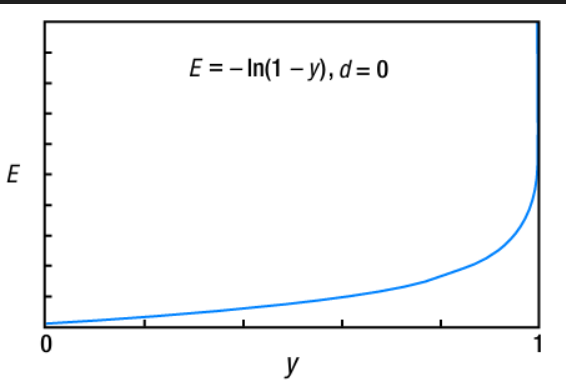

  Gambar 3-11.Fungsi entropi silang pada kondisi d = 0

Perbedaan utama fungsi entropi silang dibandingkan dengan fungsi kuadrat pada Persamaan 3.9 adalah sifat peningkatannya yang bersifat geometris. Dengan kata lain, fungsi entropi silang jauh lebih sensitif terhadap galat. Karena alasan ini, aturan pembelajaran yang diturunkan dari fungsi entropi silang umumnya diketahui menghasilkan kinerja yang lebih baik. Oleh karena itu, disarankan untuk menggunakan aturan pembelajaran berbasis entropi silang, kecuali pada kasus-kasus yang tidak dapat dihindari seperti regresi.

Kita telah memberikan pengantar yang cukup panjang mengenai fungsi biaya karena pemilihan fungsi biaya akan memengaruhi aturan pembelajaran, yaitu rumus dari algoritme back-propagation. Secara khusus, perhitungan delta pada node output mengalami sedikit perubahan. Langkah-langkah berikut akan merinci prosedur pelatihan jaringan saraf tiruan dengan menggunakan fungsi aktivasi sigmoid pada node output melalui algoritme back-propagation berbasis entropi silang.

1. **Inisialisasi bobot (weights)**  
   Setiap koneksi antar neuron diberikan bobot awal secara acak dengan nilai kecil.

2. **Forward pass (propagasi maju)**  
   Input dimasukkan ke jaringan, dihitung output, kemudian dibandingkan dengan target (label benar).  
   - Error:  
    $[e = d - y]$
   - Delta pada output node (perbedaan dengan backprop biasa):  
     - **Backprop standar (MSE):**  
       $(\delta = \varphi'(v)e) $ 
     - **Dengan Cross-Entropy:**  
       $(\delta = e)$

3. **Backward pass (propagasi balik)**  
   Delta dihitung dari output layer ke hidden layer:
   
   $[e^{(k)} = W^T \delta]$
   
   $[\delta^{(k)} = \varphi'(v^{(k)}) e^{(k)}]$

4. **Update bobot (Weight update rule)**  
   Dengan aturan:
   
   $[\Delta w_{ij} = \alpha \delta_i x_j]$

   $[w_{ij} \leftarrow w_{ij} + \Delta w_{ij}]$
   di mana $(\alpha)$ adalah learning rate.

5. **Ulangi langkah 2–4**  
   Hingga semua data training selesai, lalu ulangi untuk beberapa epoch sampai jaringan cukup terlatih.

---

#### 2. Fungsi Biaya (Cost Function)
Ada beberapa fungsi biaya yang digunakan:
- **Mean Squared Error (MSE):**
  
  $[J = \frac{1}{2} \sum_{i=1}^{M} (d_i - y_i)^2 + \frac{\lambda}{2}\|w\|^2]$

- **Cross-Entropy Loss:**
  
  $[J = \sum_{i=1}^{M} [-d_i \ln(y_i) - (1-d_i)\ln(1-y_i)] + \frac{\lambda}{2}\|w\|^2]$

Bagian tambahan $(\frac{\lambda}{2}\|w\|^2)$ disebut **regularisasi**, yang membantu mencegah overfitting dengan menahan bobot agar tidak terlalu besar.

---

#### 3. Inti Perbedaan
- Pada backpropagation klasik dengan MSE:  
  delta di output layer dihitung dengan 
$[
\delta_i^{(1)} \;\;\longleftarrow\;\; \varphi'(v_i^{(1)})] \;\;\longleftarrow\;\; e_i^{(1)}$

- Pada cross-entropy dengan aktivasi sigmoid:  
  turunan fungsi loss dan sigmoid saling meniadakan, sehingga diperoleh $(\delta_i = e_i)$.

Hal ini mempercepat konvergensi dan meningkatkan stabilitas pelatihan.

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Cross-entropy loss
def cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-9) + (1 - y_true) * np.log(1 - y_pred + 1e-9))

# Data training XOR (contoh klasik)
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Parameter jaringan
input_size = 2
hidden_size = 3
output_size = 1
lr = 0.1   # learning rate
epochs = 5000

# Inisialisasi bobot
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Training loop
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)   # output prediksi
    
    # Hitung loss
    loss = cross_entropy(y, a2)
    
    # Backpropagation
    # Delta output layer (dengan cross entropy): δ = y_pred - y
    delta2 = a2 - y
    
    dW2 = np.dot(a1.T, delta2)
    db2 = np.sum(delta2, axis=0, keepdims=True)
    
    delta1 = np.dot(delta2, W2.T) * sigmoid_derivative(z1)
    dW1 = np.dot(X.T, delta1)
    db1 = np.sum(delta1, axis=0, keepdims=True)
    
    # Update bobot
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Hasil prediksi akhir
print("Prediksi akhir:")
print(a2.round(3))

# Contoh: Fungsi Cross Entropy

### Bagian ini membahas kembali contoh back-propagation. Namun kali ini, aturan pembelajaran diturunkan dari fungsi cross entropy. Pertimbangkan pelatihan jaringan syaraf tiruan yang terdiri dari satu lapisan tersembunyi dengan empat node, tiga node input, dan satu node output. Fungsi sigmoid digunakan sebagai fungsi aktivasi untuk node tersembunyi dan node output.

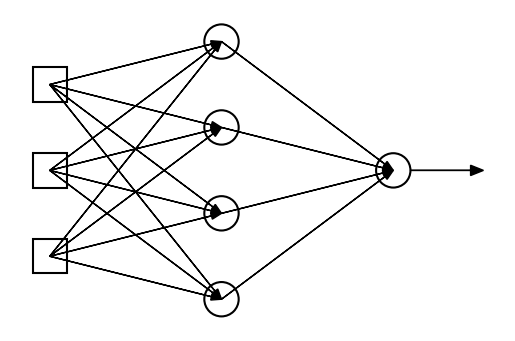

In [4]:
import matplotlib.pyplot as plt

# Fungsi untuk menggambar node
def draw_node(x, y, shape="circle"):
    if shape == "circle":
        circle = plt.Circle((x, y), 0.2, fill=False, linewidth=1.5)
        plt.gca().add_patch(circle)
    elif shape == "square":
        square = plt.Rectangle((x-0.2, y-0.2), 0.4, 0.4, fill=False, linewidth=1.5)
        plt.gca().add_patch(square)

# Fungsi untuk menggambar panah antar node
def draw_arrow(x1, y1, x2, y2):
    dx, dy = x2 - x1, y2 - y1
    plt.arrow(x1, y1, dx, dy, 
              length_includes_head=True, 
              head_width=0.08, head_length=0.12, 
              fc='k', ec='k')

# Posisi node
input_nodes = [(-2, 1), (-2, 0), (-2, -1)]
hidden_nodes = [(0, 1.5), (0, 0.5), (0, -0.5), (0, -1.5)]
output_node = (2, 0)

# Gambar edges (pakai panah)
for (xi, yi) in input_nodes:
    for (xh, yh) in hidden_nodes:
        draw_arrow(xi, yi, xh, yh)

for (xh, yh) in hidden_nodes:
    draw_arrow(xh, yh, output_node[0], output_node[1])

# Gambar node input (kotak)
for (x, y) in input_nodes:
    draw_node(x, y, shape="square")

# Gambar node hidden (lingkaran)
for (x, y) in hidden_nodes:
    draw_node(x, y, shape="circle")

# Gambar node output (lingkaran)
draw_node(output_node[0], output_node[1], shape="circle")

# Tambah panah keluar dari output ke kanan
plt.arrow(output_node[0]+0.2, output_node[1], 0.7, 0, 
          head_width=0.12, head_length=0.15, fc='k', ec='k')

# Set aspek biar proporsional
plt.gca().set_aspect('equal')
plt.axis('off')
plt.show()


#### Gambar 3-13. Jaringan syaraf tiruan dengan satu lapisan tersembunyi yang memiliki empat node, tiga node input, dan satu node output.

### Data pelatihan berisi empat elemen yang sama seperti ditunjukkan pada tabel berikut. Jika kita abaikan angka ketiga dari data input, dataset ini menyajikan operasi logika XOR. Angka paling kanan yang ditebalkan dari setiap elemen adalah output yang benar.

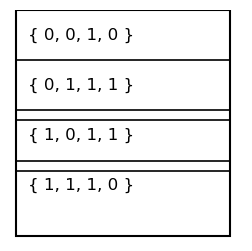

In [5]:
import matplotlib.pyplot as plt

# Data training
data = [
    "{ 0, 0, 1, 0 }",
    "{ 0, 1, 1, 1 }",
    "{ 1, 0, 1, 1 }",
    "{ 1, 1, 1, 0 }"
]

fig, ax = plt.subplots(figsize=(3,3))

# Kotak luar
rect = plt.Rectangle((-0.5, -4.5), 3.5, 4.5, fill=False, linewidth=1.5)
ax.add_patch(rect)

# Tampilkan teks
for i, row in enumerate(data):
    ax.text(-0.3, -i-0.5, row, va='center', ha='left', fontsize=12)

# Garis tunggal di bawah baris pertama
ax.hlines(-1, -0.5, 3.0, colors='k', linewidth=1.2)

# Double line di sekitar baris ketiga
ax.hlines(-2, -0.5, 3.0, colors='k', linewidth=1.2)
ax.hlines(-2.2, -0.5, 3.0, colors='k', linewidth=1.2)

# Double line di sekitar baris keempat
ax.hlines(-3, -0.5, 3.0, colors='k', linewidth=1.2)
ax.hlines(-3.2, -0.5, 3.0, colors='k', linewidth=1.2)

# Hilangkan axis
ax.set_xlim(-0.6, 3.2)
ax.set_ylim(-4.6, 0)
ax.axis('off')
plt.show()


#  **Cross Entropy Function**


Fungsi *BackpropCE* melatih data XOR menggunakan fungsi *cross entropy*.
Fungsi ini mengambil bobot (*weights*) dari jaringan syaraf serta data latih, kemudian mengembalikan bobot yang telah disesuaikan.

[W1, W2] = BackpropCE(W1, W2, X, D);


Di mana W1 dan W2 adalah matriks bobot untuk *input–hidden layer* dan *hidden–output layer*. Selain itu, X dan D masing-masing merupakan matriks input dan matriks output benar dari data. Daftar kode berikut menunjukkan file *BackpropCE.m*, yang mengimplementasikan fungsi *BackpropCE*.

In [6]:
import numpy as np

# --- fungsi aktivasi ---
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# --- fungsi BackpropCE sesuai screenshot ---
def backprop_ce(W1, W2, X, D, alpha=0.9):
    """
    W1 : bobot input -> hidden
    W2 : bobot hidden -> output
    X  : input data (N x dim)
    D  : target data (N,)
    alpha : learning rate
    """
    N = X.shape[0]

    for k in range(N):
        x = X[k, :].reshape(-1, 1)   # kolom
        d = D[k]

        # forward pass
        v1 = W1 @ x
        y1 = sigmoid(v1)

        v  = W2 @ y1
        y  = sigmoid(v)

        # error output
        e     = d - y
        delta = e  # CE + sigmoid => delta = e

        # backpropagate ke hidden
        e1     = W2.T @ delta
        delta1 = y1 * (1 - y1) * e1

        # update bobot
        dW1 = alpha * (delta1 @ x.T)
        W1  = W1 + dW1

        dW2 = alpha * (delta @ y1.T)
        W2  = W2 + dW2

    return W1, W2


# --- main program sesuai TestBackpropCE ---
if __name__ == "__main__":
    # data XOR
    X = np.array([
        [0, 0, 1],
        [0, 1, 1],
        [1, 0, 1],
        [1, 1, 1]
    ])
    D = np.array([0, 1, 1, 0])

    # inisialisasi bobot
    W1 = 2 * np.random.rand(4, 3) - 1
    W2 = 2 * np.random.rand(1, 4) - 1

    # training 10,000 epoch
    for epoch in range(10000):
        W1, W2 = backprop_ce(W1, W2, X, D)

    # inference hasil training
    N = 4
    for k in range(N):
        x = X[k, :].reshape(-1, 1)
        v1 = W1 @ x
        y1 = sigmoid(v1)
        v  = W2 @ y1
        y  = sigmoid(v)
        print(f"Input: {X[k, :2]} -> Output: {y[0,0]:.4f}")


Input: [0 0] -> Output: 0.0000
Input: [0 1] -> Output: 0.9999
Input: [1 0] -> Output: 0.9997
Input: [1 1] -> Output: 0.0004



Kode ini mengambil data pelatihan, menghitung pembaruan bobot (dW1 dan dW2) menggunakan aturan delta, lalu menyesuaikan bobot *neural network* dengan nilai-nilai tersebut.
Sejauh ini, prosesnya hampir identik dengan contoh sebelumnya. Perbedaan muncul ketika kita menghitung delta pada *output node* sebagai berikut:


Berbeda dengan kode sebelumnya, turunan dari fungsi sigmoid tidak lagi digunakan.
Hal ini karena, untuk aturan pembelajaran *cross entropy*, jika fungsi aktivasi pada output node adalah sigmoid, maka delta sama dengan *error output*.
Sementara itu, *hidden nodes* tetap mengikuti proses yang sama seperti algoritma *backpropagation* sebelumnya::


*Listing* program berikut menunjukkan *TestBackpropCE.m*, yang menguji fungsi *BackpropCE*. Program ini memanggil fungsi *BackpropCE* dan melatih *neural network* sebanyak 10.000 kali. *Neural network* yang sudah terlatih menghasilkan *output* untuk data pelatihan, dan hasilnya ditampilkan di layar.
Pelatihan *neural network* dianggap berhasil jika *output* sesuai dengan target yang benar. Penjelasan lebih lanjut dihilangkan, karena kodenya hampir identik dengan contoh sebelumnya.

In [7]:
import numpy as np

# --- fungsi aktivasi sigmoid
def sigmoid(v):
    return 1 / (1 + np.exp(-v))

# --- turunan sigmoid
def sigmoid_deriv(y):
    return y * (1 - y)

# --- fungsi backpropagation (Cross Entropy mirip dengan MSE disini untuk sederhana)
def BackpropCE(W1, W2, X, D, alpha=0.9):
    N = len(X)
    for k in range(N):
        # forward
        x = X[k, :].reshape(-1, 1)
        d = D[k]

        v1 = np.dot(W1, x)
        y1 = sigmoid(v1)

        v = np.dot(W2, y1)
        y = sigmoid(v)

        # error output
        e = d - y
        delta = e * sigmoid_deriv(y)

        # error hidden
        e1 = np.dot(W2.T, delta)
        delta1 = e1 * sigmoid_deriv(y1)

        # update bobot
        W2 += alpha * np.dot(delta, y1.T)
        W1 += alpha * np.dot(delta1, x.T)

    return W1, W2

# --- data input
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])
D = np.array([[0], [1], [1], [0]])

# --- inisialisasi bobot
W1 = 2 * np.random.rand(4, 3) - 1
W2 = 2 * np.random.rand(1, 4) - 1

# --- training
for epoch in range(10000):
    W1, W2 = BackpropCE(W1, W2, X, D)

# --- inference
for k in range(len(X)):
    x = X[k, :].reshape(-1, 1)
    v1 = np.dot(W1, x)
    y1 = sigmoid(v1)
    v = np.dot(W2, y1)
    y = sigmoid(v)
    print(f"Input: {X[k, :2]} → Prediksi: {y[0,0]:.4f}")


Input: [0 0] → Prediksi: 0.0111
Input: [0 1] → Prediksi: 0.9897
Input: [1 0] → Prediksi: 0.9897
Input: [1 1] → Prediksi: 0.0111



Menjalankan kode ini menghasilkan nilai seperti yang ditunjukkan di sini. *Output* yang diperoleh sangat dekat dengan *output* yang benar, D. Hal ini membuktikan bahwa *neural network* telah berhasil dilatih.

$$
\begin{bmatrix}
0.00003 \\
0.9999 \\
0.9998 \\
0.00036
\end{bmatrix}
\;\Longleftrightarrow\;
D =
\begin{bmatrix}
0 \\
1 \\
1 \\
0
\end{bmatrix}
$$


## Comparison of Cost Functions

Satu-satunya perbedaan antara fungsi $\text{BackpropCE}$ dari bagian sebelumnya 
dan fungsi $\textbf{BackpropXOR}$ dari bagian $\textit{``XOR Problem''}$ adalah pada 
perhitungan $\textbf{delta node keluaran}$. Kita akan meninjau bagaimana perbedaan 
kecil ini memengaruhi kinerja pembelajaran. 

Daftar berikut menunjukkan file $\textbf{CEvsSSE.m}$ yang membandingkan kesalahan 
rata-rata dari kedua fungsi tersebut. Arsitektur file ini hampir identik dengan 
file $\textbf{SGDvsBatch.m}$ pada bagian $\textit{``Comparison of the SGD and the Batch''}$ 
di Bab 2.

clear all
$$
\begin{aligned}
X=\left[\begin{array}{rrr}
0 & 0 & 1 ; \\
0 & 1 & 1 ; \\
1 & 0 & 1 ; \\
1 & 1 & 1 ;
\end{array}\right. \\
] ;
\end{aligned}
$$
$$
\begin{aligned}
\mathrm{D}=\left[\begin{array}{l}
0 \\
0 \\
1 \\
1
\end{array}\right. \\
{[] ; }
\end{aligned}
$$
$$
\begin{aligned}
& E 1=\operatorname{zeros}(1000,1) ; \\
& E 2=\operatorname{zeros}(1000,1) ;
\end{aligned}
$$
$$
\begin{array}{ll}
W 11=2^* \operatorname{rand}(4,3)-1 ; & \% \text { Cross entropy } \\
W 12=2^* \operatorname{rand}(1,4)-1 ; & \% \\
W 21=W 11 ; & \% \text { Sum of squared error } \\
W 22=W 12 ; & \%
\end{array}
$$
for epoch $=1: 1000$
[W11 W12] = BackpropCE(W11, W12, X, D);
[W21 W22] = BackpropXOR(W21, W22, X, D);
$$
\begin{aligned}
& \mathrm{es} 1=0 ; \\
& \mathrm{es} 2=0 ; \\
& \mathrm{N} \quad=4 ;
\end{aligned}
$$
for $\mathrm{k}=1: \mathrm{N}$
$$
\begin{aligned}
& x=X(k,:)^{\prime} ; \\
& d=D(k) ;
\end{aligned}
$$
$$
\begin{aligned}
& v 1=\text { W11*x; } \\
& y 1=\text { Sigmoid }(v 1) ; \\
& v \\
& y=\text { W12*y1; } \\
& y=\text { Sigmoid }(v) ; \\
& \text { es1 }=\text { es1 }+(d-y)^{\wedge} 2 ;
\end{aligned}
$$
$$
\begin{aligned}
& \mathrm{v} 1=\text { W21*x; } \\
& \mathrm{y} 1=\text { Sigmoid(v1); } \\
& \mathrm{v}=\text { W22*y1; }
\end{aligned}
$$

```
        y = Sigmoid(v);
        es2 = es2 + (d - y)^2;
    end
    E1(epoch) = es1 /N;
    E2(epoch) = es2 /N;
end
plot(E1, 'r')
hold on
plot(E2, 'b:')
xlabel('Epoch')
ylabel('Average of Training error')
legend('Cross Entropy', 'Sum of Squared Error')
```
Program ini memanggil fungsi $\textbf{BackpropCE}$ dan $\textbf{BackpropXOR}$ 
serta melatih jaringan syaraf masing-masing sebanyak 1.000 kali. 
Jumlah kuadrat dari kesalahan keluaran $(\texttt{es1} dan \texttt{es2})$ 
dihitung pada setiap $\textit{epoch}$ untuk masing-masing jaringan syaraf, 
dan rata-ratanya $(\texttt{E1} dan \texttt{E2})$ kemudian dihitung. 

$\texttt{W11}$, $\texttt{W12}$, $\texttt{W21}$, dan $\texttt{W22}$ adalah matriks bobot 
dari masing-masing jaringan syaraf. Setelah 1.000 pelatihan selesai, 
rata-rata kesalahan dibandingkan terhadap \textit{epoch} pada grafik. 

Seperti ditunjukkan pada Gambar 3--14, pelatihan yang didorong oleh 
$\textit{cross entropy}$ menurunkan kesalahan pelatihan dengan jauh lebih cepat. 
Dengan kata lain, aturan pembelajaran berbasis $\textit{cross entropy}$ 
menghasilkan proses pembelajaran yang lebih cepat. 
Inilah alasan mengapa sebagian besar fungsi biaya pada $\textit{Deep Learning}$ 
menggunakan fungsi $\textit{cross entropy}$.


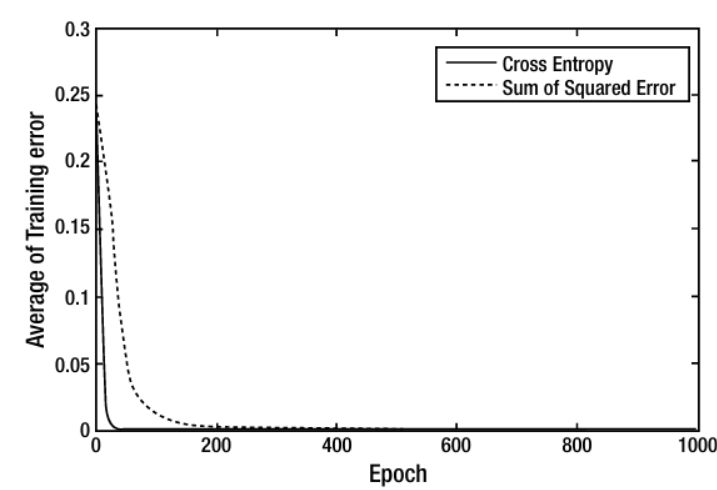

Gambar 3.14 Pelatihan yang didorong oleh entropi silang mengurangi kesalahan pelatihan dengan 
kecepatan yang jauh lebih cepat

Ini menyelesaikan penjelasan tentang algoritma back-propagation. Jika Anda 
kesulitan memahaminya, jangan putus asa. Sebenarnya, memahami algoritma back-
propagation bukanlah faktor yang krusial saat mempelajari dan mengembangkan Deep 
Learning. Karena sebagian besar perpustakaan Deep Learning sudah menyertakan 
algoritma tersebut; kita bisa langsung menggunakannya. Jangan berkecil hati! Deep Learning hanya satu bab lagi.

## Ringkasan
  Bab ini membahas konsep-konsep berikut: 
 •    Jaringan saraf tiruan berlapis tidak dapat dilatih menggunakan aturan delta;
 ia harus dilatih menggunakan algoritma back-propagation,
 yang juga digunakan sebagai aturan pembelajaran dalam Deep Learning.
 •    Algoritma back-propagation mendefinisikan kesalahan lapisan tersembunyi 
saat kesalahan output diteruskan ke belakang dari lapisan output. 
Setelah kesalahan lapisan tersembunyi diperoleh, bobot setiap lapisan 
disesuaikan menggunakan aturan delta. Pentingnya algoritma back-
propagation adalah bahwa ia menyediakan metode sistematis untuk 
mendefinisikan kesalahan node tersembunyi.

Jaringan saraf tunggal lapisan hanya berlaku untuk masalah yang 
dapat dipisahkan secara linier, dan sebagian besar masalah praktis 
tidak dapat dipisahkan secara linier.
 •    Jaringan saraf multi-lapisan mampu memodelkan masalah yang 
tidak dapat dipisahkan secara linier.
 •    Banyak jenis penyesuaian bobot tersedia dalam algoritma 
backpropagation. Pengembangan berbagai pendekatan penyesuaian 
bobot disebabkan oleh upaya untuk mencapai pembelajaran jaringan 
yang lebih stabil dan lebih cepat. Ciri-ciri ini 
terutama bermanfaat untuk Deep Learning yang sulit dipelajari.
 •    Fungsi biaya menangani kesalahan output jaringan saraf dan 
berbanding lurus dengan kesalahan. Entropi silang telah 
luas digunakan dalam aplikasi terbaru. Dalam kebanyakan kasus, 
aturan pembelajaran yang didorong oleh entropi silang diketahui 
memberikan kinerja yang lebih baik.
 •    Aturan pembelajaran jaringan saraf bervariasi tergantung pada 
fungsi biaya dan fungsi aktivasi. Secara spesifik, perhitungan delta 
pada node output diubah.
 •    Regularisasi, yang merupakan salah satu pendekatan untuk mengatasi 
overfitting, juga diimplementasikan sebagai penambahan istilah bobot ke 
dalam fungsi biaya.